In [2]:
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 1s 0us/step


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [19]:
print(len(train_data))
print(len(test_data))


8982
2246


In [8]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[1]])

decoded_newswire

'? generale de banque sa lt ? br and lt heller overseas corp of chicago have each taken 50 pct stakes in ? company sa ? factors generale de banque said in a statement it gave no financial details of the transaction sa ? ? turnover in 1986 was 17 5 billion belgian francs reuter 3'

In [10]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [13]:
from tensorflow.keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [48]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [49]:
history = model.fit(partial_x_train, partial_y_train,
                   epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 24ms/step - loss: 3.0735 - accuracy: 0.4054 - val_loss: 1.6559 - val_accuracy: 0.6180
Epoch 2/20
16/16 [==============================] - 0s 11ms/step - loss: 1.4701 - accuracy: 0.6816 - val_loss: 1.3155 - val_accuracy: 0.7020
Epoch 3/20
16/16 [==============================] - 0s 11ms/step - loss: 1.1039 - accuracy: 0.7523 - val_loss: 1.1557 - val_accuracy: 0.7450
Epoch 4/20
16/16 [==============================] - 0s 11ms/step - loss: 0.8408 - accuracy: 0.8117 - val_loss: 1.2012 - val_accuracy: 0.7130
Epoch 5/20
16/16 [==============================] - 0s 11ms/step - loss: 0.6830 - accuracy: 0.8479 - val_loss: 0.9913 - val_accuracy: 0.7930
Epoch 6/20
16/16 [==============================] - 0s 11ms/step - loss: 0.5438 - accuracy: 0.8817 - val_loss: 0.9520 - val_accuracy: 0.8120
Epoch 7/20
16/16 [==============================] - 0s 11ms/step - loss: 0.4245 - accuracy: 0.9082 - val_loss: 0.9455 - val_accuracy: 0.8040
Epoch 8/20
16

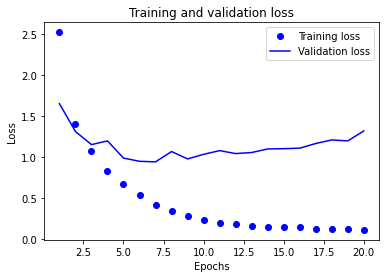

In [50]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

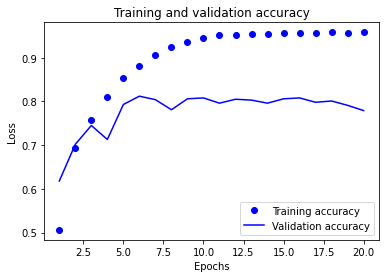

In [51]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [30]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train,
                   epochs=9, batch_size=512, validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

results

Epoch 1/9
16/16 [==============================] - 1s 23ms/step - loss: 3.2356 - accuracy: 0.3819 - val_loss: 1.7536 - val_accuracy: 0.6560
Epoch 2/9
16/16 [==============================] - 0s 11ms/step - loss: 1.5188 - accuracy: 0.7071 - val_loss: 1.2941 - val_accuracy: 0.7210
Epoch 3/9
16/16 [==============================] - 0s 11ms/step - loss: 1.0675 - accuracy: 0.7774 - val_loss: 1.1232 - val_accuracy: 0.7690
Epoch 4/9
16/16 [==============================] - 0s 12ms/step - loss: 0.8375 - accuracy: 0.8241 - val_loss: 1.0340 - val_accuracy: 0.7800
Epoch 5/9
16/16 [==============================] - 0s 11ms/step - loss: 0.6718 - accuracy: 0.8635 - val_loss: 0.9984 - val_accuracy: 0.7870
Epoch 6/9
16/16 [==============================] - 0s 11ms/step - loss: 0.5305 - accuracy: 0.8905 - val_loss: 0.9482 - val_accuracy: 0.8090
Epoch 7/9
16/16 [==============================] - 0s 11ms/step - loss: 0.4455 - accuracy: 0.9049 - val_loss: 0.8983 - val_accuracy: 0.8160
Epoch 8/9
16/16 [===

[1.0630474090576172, 0.771148681640625]

In [31]:
predictions = model.predict(x_test)

np.argmax(predictions[0])

3

In [32]:
predictions[0]

array([4.0500279e-05, 6.3129002e-05, 3.0936593e-07, 9.8567998e-01,
       1.1281171e-02, 9.3375138e-06, 6.5551417e-06, 1.0512689e-06,
       5.5586017e-04, 2.6888203e-05, 2.8174011e-06, 1.3333514e-04,
       1.9434813e-04, 5.5498158e-06, 1.3492853e-05, 1.6574773e-05,
       4.7309339e-04, 5.8892445e-05, 1.7596923e-05, 2.7471071e-04,
       2.4612344e-04, 1.1788788e-04, 4.6523601e-07, 8.4933003e-05,
       2.1619931e-07, 2.5975620e-04, 1.0920808e-06, 1.4183892e-05,
       1.1834572e-05, 4.4641369e-05, 2.2838924e-05, 2.6259830e-05,
       5.2584255e-06, 1.9624638e-06, 2.7142749e-05, 3.4878929e-06,
       1.8191725e-04, 7.9497295e-06, 1.8070239e-06, 2.8002243e-05,
       6.5213085e-06, 4.2913867e-05, 2.1211481e-06, 3.8739236e-06,
       8.9446228e-09, 1.4665998e-06], dtype=float32)